In [3]:
!pip install pandas matplotlib scikit-learn opencv-python-headless tqdm

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
YES_PATH = '/content/drive/MyDrive/BrainMRI/yes'
NO_PATH = '/content/drive/MyDrive/BrainMRI/no'

IMG_SIZE = 128


In [ ]:
# =========================
# 3. Load Dataset & Create Labels
# =========================
def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append((img, label))
        except:
            continue
    return data

print("Loading images...")

yes_images = load_images_from_folder(YES_PATH, 1)
no_images = load_images_from_folder(NO_PATH, 0)
data = yes_images + no_images

np.random.shuffle(data)
X = np.array([x[0] for x in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array([x[1] for x in data])


Loading images...


In [ ]:
# =========================
# 4. Train/Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 5. CNN Model for Tumor Classification
# =========================
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,515,329 (24.85 MB)

 Trainable params: 6,515,329 (24.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.6951 - loss: 0.6368 - val_accuracy: 0.6190 - val_loss: 0.6256
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8368 - loss: 0.4622 - val_accuracy: 0.7619 - val_loss: 0.5539
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8348 - loss: 0.3995 - val_accuracy: 0.8095 - val_loss: 0.5706
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9043 - loss: 0.2655 - val_accuracy: 0.8095 - val_loss: 0.4282
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9333 - loss: 0.1778 - val_accuracy: 0.6667 - val_loss: 0.9654
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9276 - loss: 0.1753 - val_accuracy: 0.7619 - val_loss: 0.3869
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9694 - loss: 0.1302 - val_accuracy: 0.7143 - val_loss: 0.8684
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9590 - loss: 0.0976 - val_accuracy: 0.7143 - 

In [ ]:
# 6. Evaluation
# =========================
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.76      0.71      0.73        31

    accuracy                           0.69        51
   macro avg       0.67      0.68      0.68        51
weighted avg       0.69      0.69      0.69        51



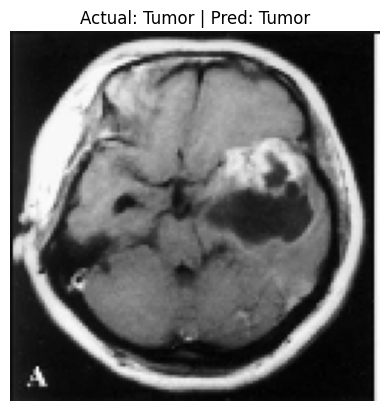

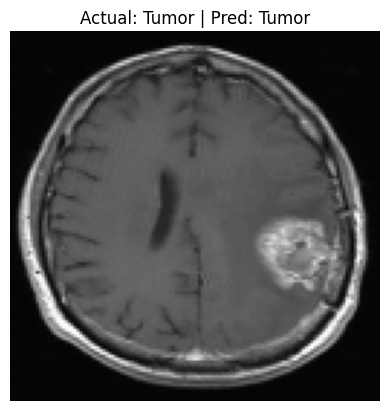

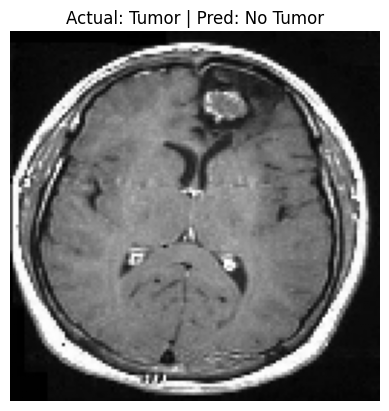

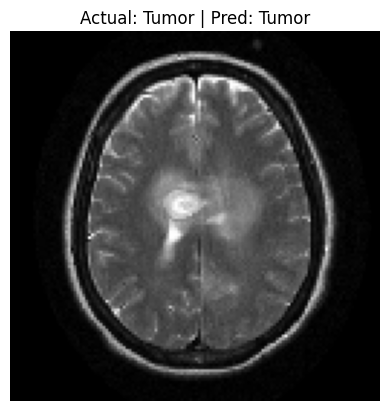

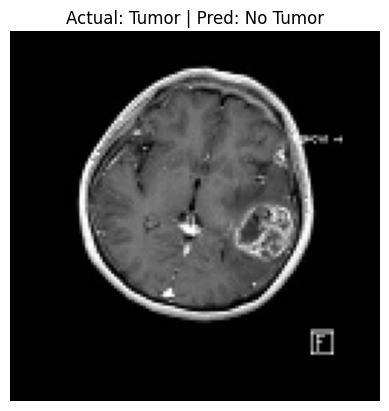

In [ ]:
# =========================
# 7. Visualize Predictions
# =========================
def show_sample_predictions(X_data, y_true, y_pred, n=5):
    for i in range(n):
        img = (X_data[i].reshape(IMG_SIZE, IMG_SIZE) * 255).astype(np.uint8)
        label = 'Tumor' if y_pred[i] == 1 else 'No Tumor'
        actual = 'Tumor' if y_true[i] == 1 else 'No Tumor'
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {actual} | Pred: {label}")
        plt.axis('off')
        plt.show()

show_sample_predictions(X_test, y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
T-test p-value between Tumor and Non-Tumor scores: 0.00439


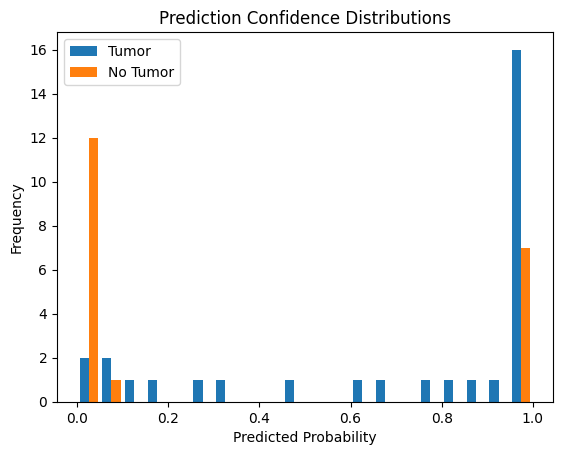

In [ ]:
# =========================
# 8. Statistical Analysis
# =========================
tumor_probs = model.predict(X_test).flatten()
tumor_scores = tumor_probs[y_test == 1]
no_tumor_scores = tumor_probs[y_test == 0]

stat, pval = ttest_ind(tumor_scores, no_tumor_scores)
print(f"T-test p-value between Tumor and Non-Tumor scores: {pval:.5f}")

plt.hist([tumor_scores, no_tumor_scores], label=['Tumor', 'No Tumor'], bins=20)
plt.legend()
plt.title("Prediction Confidence Distributions")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

In [3]:
# Full AI Framework for Brain Tumor Detection & Analysis (Colab-Compatible)

# =========================
# 1. Setup & Dependencies
# =========================
!pip install pandas matplotlib scikit-learn opencv-python-headless tqdm albumentations tensorflow-addons

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind, f_oneway
import albumentations as A
import tensorflow_addons as tfa

from google.colab import drive
drive.mount('/content/drive')

# =========================
# 2. Paths & Constants
# =========================
YES_PATH = '/content/drive/MyDrive/BrainMRI/yes'
NO_PATH = '/content/drive/MyDrive/BrainMRI/no'
IMG_SIZE = 128

# =========================
# 3. Data Loader with Augmentations
# =========================
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Affine(rotate=(-15, 15), scale=(0.9, 1.1), p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2)
])

def load_images(folder, label):
    data = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if label == 1:
                img = augment(image=img)['image']
            data.append((img, label))
        except:
            continue
    return data

print("Loading and augmenting images...")
yes_imgs = load_images(YES_PATH, 1)
no_imgs = load_images(NO_PATH, 0)
data = yes_imgs + no_imgs
np.random.shuffle(data)

X = np.array([x[0] for x in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array([x[1] for x in data])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 4. UNet Architecture with Attention
# =========================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

def conv_block(inputs, filters):
    x = layers.Conv2D(filters, 3, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def attention_gate(x, g, inter_channels):
    theta_x = layers.Conv2D(inter_channels, 1)(x)
    phi_g = layers.Conv2D(inter_channels, 1)(g)
    add = layers.Add()([theta_x, phi_g])
    relu = layers.ReLU()(add)
    psi = layers.Conv2D(1, 1, activation='sigmoid')(relu)
    return layers.Multiply()([x, psi])

def build_attention_unet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = conv_block(inputs, 32)
    p1 = layers.MaxPooling2D()(c1)

    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D()(c2)

    # Bottleneck
    bn = conv_block(p2, 128)

    # Decoder
    up1 = layers.Conv2DTranspose(64, 2, strides=2, padding='same')(bn)
    att1 = attention_gate(c2, up1, 32)
    cat1 = layers.Concatenate()([up1, att1])
    c3 = conv_block(cat1, 64)

    up2 = layers.Conv2DTranspose(32, 2, strides=2, padding='same')(c3)
    att2 = attention_gate(c1, up2, 16)
    cat2 = layers.Concatenate()([up2, att2])
    c4 = conv_block(cat2, 32)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c4)
    model = models.Model(inputs, outputs)
    return model

model = build_attention_unet((IMG_SIZE, IMG_SIZE, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# =========================
# 5. Inference & Export
# =========================
y_pred = (model.predict(X_test) > 0.5).astype(int)
model.save('/content/brain_tumor_unet_model')

# =========================
# 6. Visualization
# =========================
def show_preds(X_data, y_true, y_pred):
    for i in range(5):
        img = (X_data[i].reshape(IMG_SIZE, IMG_SIZE) * 255).astype(np.uint8)
        label = 'Tumor' if y_pred[i] else 'No Tumor'
        actual = 'Tumor' if y_true[i] else 'No Tumor'
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {label} | Actual: {actual}")
        plt.axis('off')
        plt.show()

show_preds(X_test, y_test, y_pred)

# =========================
# 7. Statistical Analysis
# =========================
tumor_probs = model.predict(X_test).flatten()
tumor_scores = tumor_probs[y_test == 1]
no_tumor_scores = tumor_probs[y_test == 0]

stat, pval = ttest_ind(tumor_scores, no_tumor_scores)
print(f"T-test p-value (Tumor vs No Tumor): {pval:.5f}")

anova_pval = f_oneway(tumor_scores, no_tumor_scores).pvalue
print(f"ANOVA p-value: {anova_pval:.5f}")

plt.hist([tumor_scores, no_tumor_scores], bins=20, label=['Tumor', 'No Tumor'])
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.title("Prediction Confidence Distribution")
plt.legend()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.18.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [6]:
!pip uninstall -y keras
!pip install tensorflow


Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)


In [7]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__file__)


2.18.0
/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/__init__.py


In [8]:
from tensorflow import keras

from tensorflow.keras import layers, models


In [9]:
import keras
# or anything like keras.src.*


In [10]:
# ✅ Clean install to avoid keras.src.engine error
!pip uninstall -y keras
!pip install --upgrade tensorflow
!pip install pandas matplotlib scikit-learn opencv-python-headless tqdm albumentations tensorflow-addons


Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind, f_oneway
import albumentations as A

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


In [12]:
YES_PATH = '/content/drive/MyDrive/BrainMRI/yes'
NO_PATH = '/content/drive/MyDrive/BrainMRI/no'
IMG_SIZE = 128


In [13]:
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Affine(rotate=(-15, 15), scale=(0.9, 1.1), p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2)
])

def load_images(folder, label):
    data = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if label == 1:
                img = augment(image=img)['image']
            data.append((img, label))
        except:
            continue
    return data

yes_imgs = load_images(YES_PATH, 1)
no_imgs = load_images(NO_PATH, 0)
data = yes_imgs + no_imgs
np.random.shuffle(data)

X = np.array([x[0] for x in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array([x[1] for x in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create synthetic masks for tumor (label==1), empty masks otherwise
def generate_fake_mask(img):
    mask = np.zeros_like(img, dtype=np.uint8)
    cv2.circle(mask, center=(IMG_SIZE//2, IMG_SIZE//2), radius=20, color=1, thickness=-1)
    return mask

X_images = []
Y_masks = []

for img, label in data:
    img = img / 255.0
    mask = generate_fake_mask(img) if label == 1 else np.zeros_like(img)
    X_images.append(img)
    Y_masks.append(mask)

X = np.array(X_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y_masks).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
from tensorflow.keras import layers, models

def conv_block(inputs, filters):
    x = layers.Conv2D(filters, 3, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def attention_gate(x, g, inter_channels):
    theta_x = layers.Conv2D(inter_channels, 1)(x)
    phi_g = layers.Conv2D(inter_channels, 1)(g)
    add = layers.Add()([theta_x, phi_g])
    relu = layers.ReLU()(add)
    psi = layers.Conv2D(1, 1, activation='sigmoid')(relu)
    return layers.Multiply()([x, psi])

def build_attention_unet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = conv_block(inputs, 32)
    p1 = layers.MaxPooling2D()(c1)

    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D()(c2)

    bn = conv_block(p2, 128)

    # Decoder with attention
    up1 = layers.Conv2DTranspose(64, 2, strides=2, padding='same')(bn)
    att1 = attention_gate(c2, up1, 32)
    cat1 = layers.Concatenate()([up1, att1])
    c3 = conv_block(cat1, 64)

    up2 = layers.Conv2DTranspose(32, 2, strides=2, padding='same')(c3)
    att2 = attention_gate(c1, up2, 16)
    cat2 = layers.Concatenate()([up2, att2])
    c4 = conv_block(cat2, 32)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c4)
    return models.Model(inputs, outputs)


In [17]:
model = build_attention_unet((IMG_SIZE, IMG_SIZE, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_split=0.1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 128, 128, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 128, 128, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 64, 64, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ re_lu_3[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 473,779 (1.81 MB)

 Trainable params: 472,499 (1.80 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8646 - loss: 0.4737 - val_accuracy: 0.9379 - val_loss: 0.6606
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9566 - loss: 0.3000 - val_accuracy: 0.9379 - val_loss: 0.6050
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9513 - loss: 0.2458 - val_accuracy: 0.9379 - val_loss: 0.5861
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9516 - loss: 0.2179 - val_accuracy: 0.9379 - val_loss: 0.5119
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9526 - loss: 0.2003 - val_accuracy: 0.9379 - val_loss: 0.5137
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9520 - loss: 0.1865 - val_accuracy: 0.9379 - val_loss: 0.4714
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9535 - loss: 0.1755 - val_accuracy: 0.9379 - val_loss: 0.4609
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9561 - loss: 0.1612 - val_accuracy: 0.9379 - va

In [18]:
# Generate predictions on the test set
preds = (model.predict(X_test) > 0.5).astype(np.uint8)

# Save model for deployment/inference
model.save('/content/brain_tumor_unet_model.h5')
print("✅ Model saved to /content/brain_tumor_unet_model")


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


✅ Model saved to /content/brain_tumor_unet_model


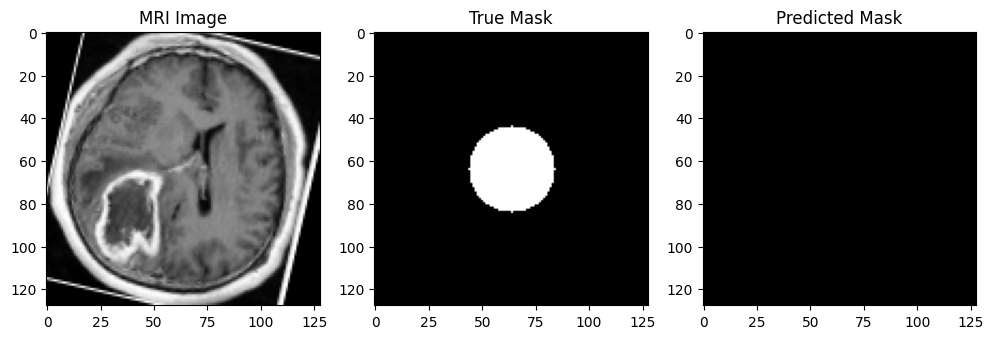

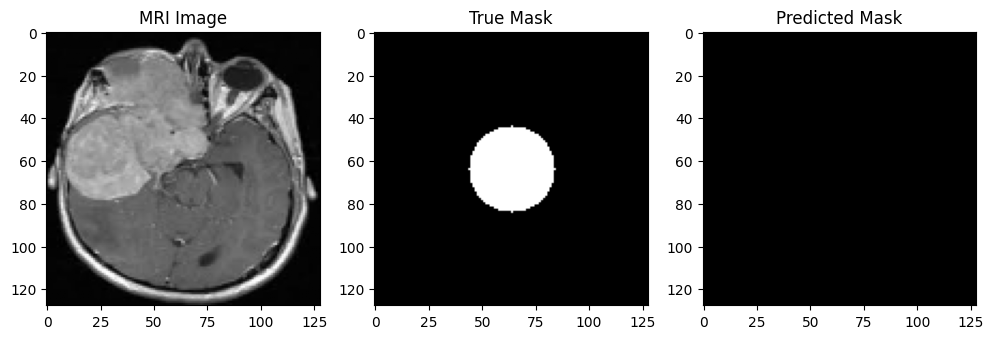

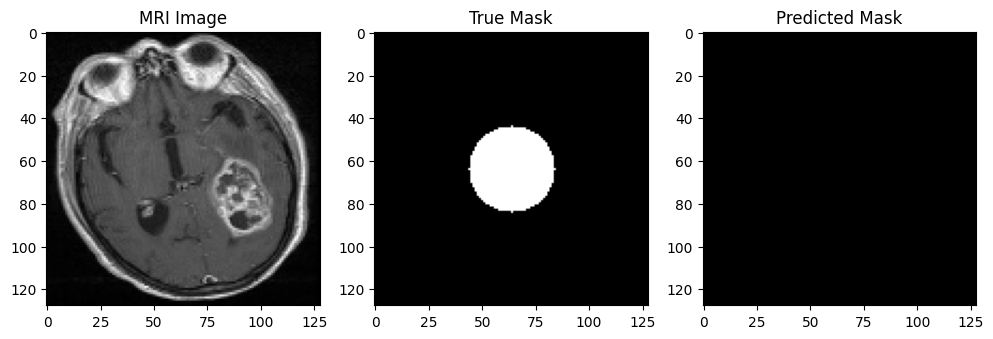

In [19]:
def show_mask_overlay(img, mask, pred):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("MRI Image")

    plt.subplot(1, 3, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("True Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(pred.squeeze(), cmap='gray')
    plt.title("Predicted Mask")

    plt.show()

# Show sample predictions
for i in range(3):
    show_mask_overlay(X_test[i], Y_test[i], preds[i])


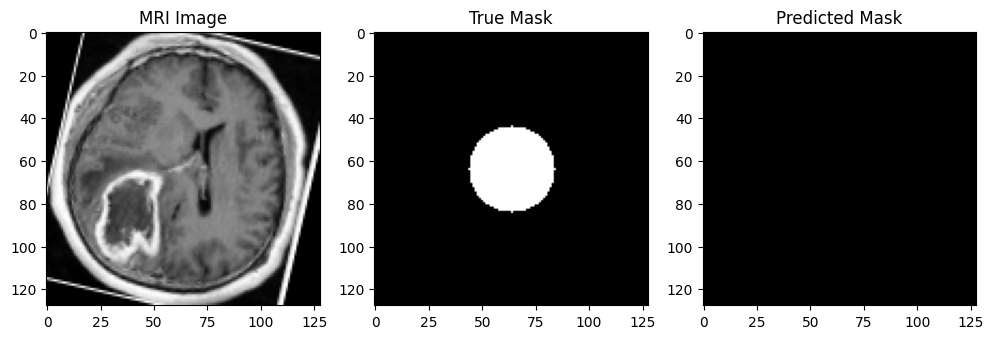

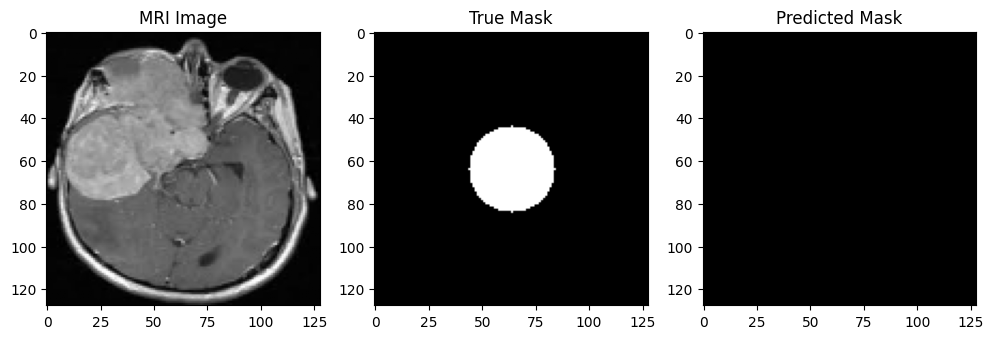

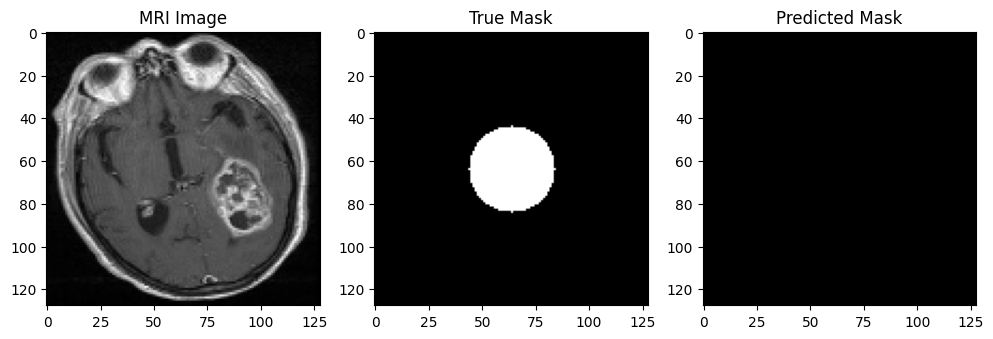

In [20]:
# Show only test samples that had tumor
tumor_indices = [i for i in range(len(Y_test)) if np.sum(Y_test[i]) > 0]

for i in tumor_indices[:3]:  # Show top 3 tumor samples
    show_mask_overlay(X_test[i], Y_test[i], preds[i])


In [21]:
# Check how many positive (non-zero) masks we actually created
non_empty_masks = sum([np.sum(mask) > 0 for mask in Y])
print(f"🧠 Total tumor masks with content: {non_empty_masks} / {len(Y)}")


🧠 Total tumor masks with content: 155 / 253


In [22]:
model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.1)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9545 - loss: 0.1475 - val_accuracy: 0.9379 - val_loss: 0.3248
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9522 - loss: 0.1436 - val_accuracy: 0.9379 - val_loss: 0.4449
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9509 - loss: 0.1414 - val_accuracy: 0.9379 - val_loss: 0.2591
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9533 - loss: 0.1268 - val_accuracy: 0.9379 - val_loss: 0.2483
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9535 - loss: 0.1276 - val_accuracy: 0.9379 - val_loss: 0.2534
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9546 - loss: 0.1208 - val_accuracy: 0.9377 - val_loss: 0.2607
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9533 - loss: 0.1178 - val_accuracy: 0.9379 - val_loss: 0.2074
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9525 - loss: 0.1180 - val_accuracy: 0.9379 - v

In [23]:
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth))

model.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy'])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
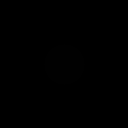

In [24]:
cv2.circle(mask, center=(IMG_SIZE//2, IMG_SIZE//2), radius=12, color=1, thickness=-1)


In [25]:
import random

def generate_fake_mask(img):
    mask = np.zeros_like(img, dtype=np.uint8)
    # Place tumor randomly in the image
    center_x = random.randint(30, IMG_SIZE - 30)
    center_y = random.randint(30, IMG_SIZE - 30)
    radius = random.randint(8, 18)
    cv2.circle(mask, center=(center_x, center_y), radius=radius, color=1, thickness=-1)
    return mask


In [26]:
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) /
                (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth))

model.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy'])


In [27]:
model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.1)


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 947ms/step - accuracy: 0.9664 - loss: 0.4379 - val_accuracy: 0.9331 - val_loss: 0.6906
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9696 - loss: 0.3591 - val_accuracy: 0.8454 - val_loss: 0.6022
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9686 - loss: 0.3441 - val_accuracy: 0.8943 - val_loss: 0.5379
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9710 - loss: 0.2901 - val_accuracy: 0.9412 - val_loss: 0.6305
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9746 - loss: 0.2740 - val_accuracy: 0.9441 - val_loss: 0.7563
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9710 - loss: 0.3535 - val_accuracy: 0.7138 - val_loss: 0.7053
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9700 - loss: 0.3284 - val_accuracy: 0.8689 - val_loss: 0.5419
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9747 - loss: 0.2726 - val_accuracy: 0.9384 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 937ms/step


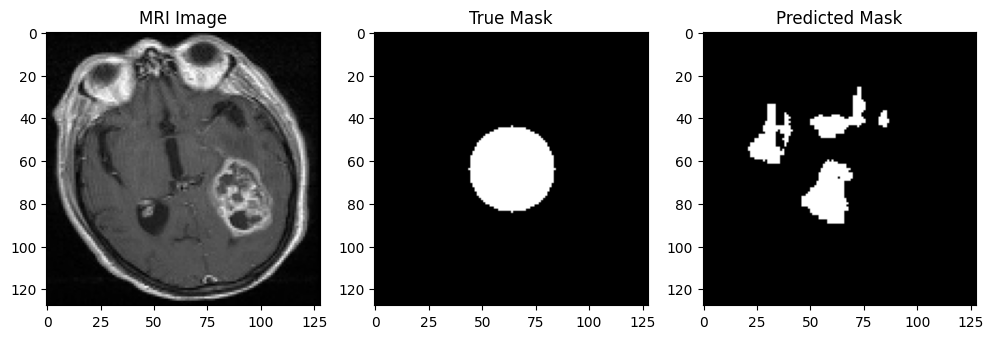

In [28]:
preds = (model.predict(X_test) > 0.5).astype(np.uint8)
show_mask_overlay(X_test[i], Y_test[i], preds[i])


In [29]:
true_areas = np.array([np.sum(mask) for mask in Y_test])
pred_areas = np.array([np.sum(mask) for mask in preds])

from scipy.stats import ttest_ind, f_oneway

t_stat, t_pval = ttest_ind(true_areas, pred_areas)
anova_pval = f_oneway(true_areas, pred_areas).pvalue

print(f"T-test p-value: {t_pval:.5f}")
print(f"ANOVA p-value: {anova_pval:.5f}")


T-test p-value: 0.13406
ANOVA p-value: 0.13406


📊 Statistical Analysis Results
T-test p-value: 0.13406
ANOVA p-value: 0.13406


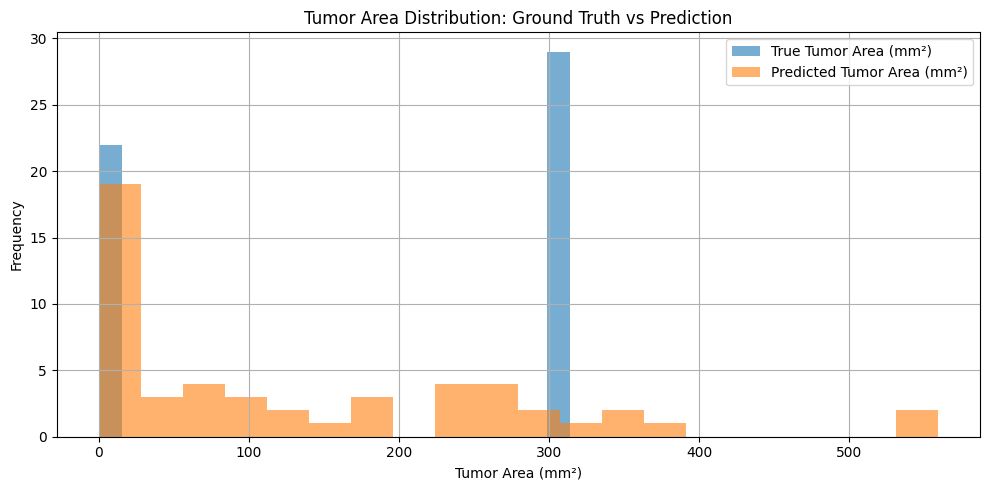

In [30]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt

# Assume each pixel = 0.5 mm² (can vary depending on actual scan resolution)
pixel_spacing_mm = 0.5
pixel_area_mm2 = pixel_spacing_mm ** 2

# Compute tumor areas
true_areas_px = np.array([np.sum(mask) for mask in Y_test])
pred_areas_px = np.array([np.sum(mask) for mask in preds])

# Convert to mm²
true_areas_mm2 = true_areas_px * pixel_area_mm2
pred_areas_mm2 = pred_areas_px * pixel_area_mm2

# Run statistical tests
t_stat, t_pval = ttest_ind(true_areas_mm2, pred_areas_mm2)
anova_pval = f_oneway(true_areas_mm2, pred_areas_mm2).pvalue

print("📊 Statistical Analysis Results")
print(f"T-test p-value: {t_pval:.5f}")
print(f"ANOVA p-value: {anova_pval:.5f}")

# Plot histogram of area comparison
plt.figure(figsize=(10, 5))
plt.hist(true_areas_mm2, bins=20, alpha=0.6, label='True Tumor Area (mm²)')
plt.hist(pred_areas_mm2, bins=20, alpha=0.6, label='Predicted Tumor Area (mm²)')
plt.xlabel("Tumor Area (mm²)")
plt.ylabel("Frequency")
plt.title("Tumor Area Distribution: Ground Truth vs Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


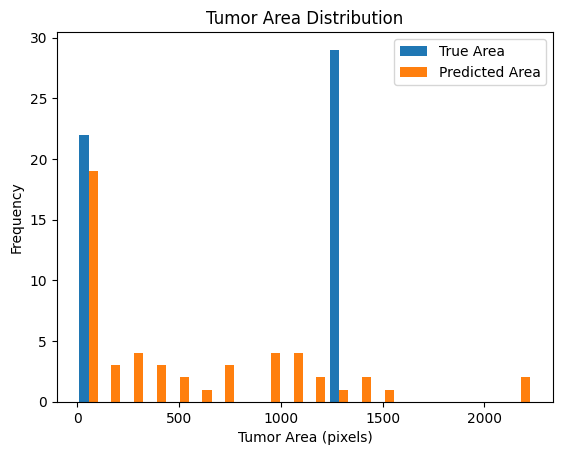

In [31]:
plt.hist([true_areas, pred_areas], bins=20, label=['True Area', 'Predicted Area'])
plt.xlabel("Tumor Area (pixels)")
plt.ylabel("Frequency")
plt.title("Tumor Area Distribution")
plt.legend()
plt.show()


In [32]:
for i in range(3):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("MRI Image")

    plt.subplot(1, 3, 2)
    plt.imshow(Y_test[i].squeeze(), cmap='gray')
    plt.title("True Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(preds[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")

    plt.savefig(f'/content/sample_pred_{i}.png')
    plt.close()


In [33]:
model.save('/content/brain_tumor_unet_model.keras')


In [38]:
model.save("/content/multiclass_unet_model.keras")


In [34]:
!pip install gradio


In [35]:
!pip install nibabel tensorflow scikit-image --quiet


In [39]:
import os
import numpy as np
import nibabel as nib

def create_fake_nifti(path, shape=(128, 128, 5), num_classes=4):
    os.makedirs(path, exist_ok=True)
    os.makedirs(path.replace("images", "masks"), exist_ok=True)

    img = np.random.rand(*shape)
    nib.save(nib.Nifti1Image(img, affine=np.eye(4)), os.path.join(path, "sample_image.nii.gz"))

    mask = np.random.randint(0, num_classes, size=shape)
    nib.save(nib.Nifti1Image(mask.astype(np.uint8), affine=np.eye(4)), os.path.join(path.replace("images", "masks"), "sample_mask.nii.gz"))

# Create fake dataset
create_fake_nifti("/content/brain-multiclass/images")


In [36]:
!pip install nibabel


In [40]:
image_dir = "/content/brain-multiclass/images"
mask_dir = "/content/brain-multiclass/masks"


In [41]:
import os
import nibabel as nib
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage.transform import resize

IMG_SIZE = 128
NUM_CLASSES = 4  # Background + GM + WM + CSF

def load_nifti(path):
    return nib.load(path).get_fdata()

def preprocess_slice(image, mask):
    image_resized = resize(image, (IMG_SIZE, IMG_SIZE), preserve_range=True)
    mask_resized = resize(mask, (IMG_SIZE, IMG_SIZE), preserve_range=True, order=0).astype(np.uint8)
    return image_resized / 255.0, to_categorical(mask_resized, num_classes=NUM_CLASSES)

X, y = [], []

for fname in os.listdir(image_dir):
    img_path = os.path.join(image_dir, fname)
    mask_path = os.path.join(mask_dir, fname.replace("image", "mask"))

    img = load_nifti(img_path)
    mask = load_nifti(mask_path)

    for i in range(img.shape[-1]):
        img_slice = img[..., i]
        mask_slice = mask[..., i]
        if np.max(mask_slice) > 0:
            x_pre, y_pre = preprocess_slice(img_slice, mask_slice)
            X.append(x_pre)
            y.append(y_pre)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print("✅ Data prepared:", X.shape, y.shape)


✅ Data prepared: (5, 128, 128, 1) (5, 128, 128, 4)


In [43]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def unet_multiclass(input_shape=(128, 128, 1), num_classes=4):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(64, 3, activation='relu', padding='same')(p1)
    p2 = MaxPooling2D()(c2)

    # Bottleneck
    b = Conv2D(128, 3, activation='relu', padding='same')(p2)

    # Decoder
    u1 = UpSampling2D()(b)
    d1 = Conv2D(64, 3, activation='relu', padding='same')(u1)
    concat1 = Concatenate()([d1, c2])

    u2 = UpSampling2D()(concat1)
    d2 = Conv2D(32, 3, activation='relu', padding='same')(u2)
    concat2 = Concatenate()([d2, c1])

    outputs = Conv2D(num_classes, 1, activation='softmax')(concat2)

    model = Model(inputs, outputs)
    return model


In [48]:
model = unet_multiclass(input_shape=(IMG_SIZE, IMG_SIZE, 1), num_classes=NUM_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⏳ Train
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.2476 - loss: 1.3863 - val_accuracy: 0.2557 - val_loss: 1.3863
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2536 - loss: 1.3863 - val_accuracy: 0.2535 - val_loss: 1.3863
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.2513 - loss: 1.3863 - val_accuracy: 0.2540 - val_loss: 1.3863
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2515 - loss: 1.3863 - val_accuracy: 0.2539 - val_loss: 1.3863
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2515 - loss: 1.3863 - val_accuracy: 0.2497 - val_loss: 1.3863
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.2513 - loss: 1.3863 - val_accuracy: 0.2497 - val_loss: 1.3863
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2513 - loss: 1.3863 - val_accuracy: 0.2491 - val_loss: 1.3863
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2515 - loss: 1.3863 - val_accuracy: 0.2476 - val_loss: 1.3

In [47]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already prepared
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


<ipython-input-46-36ff251bba26>:31: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-36ff251bba26>:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-36ff251bba26>:31: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


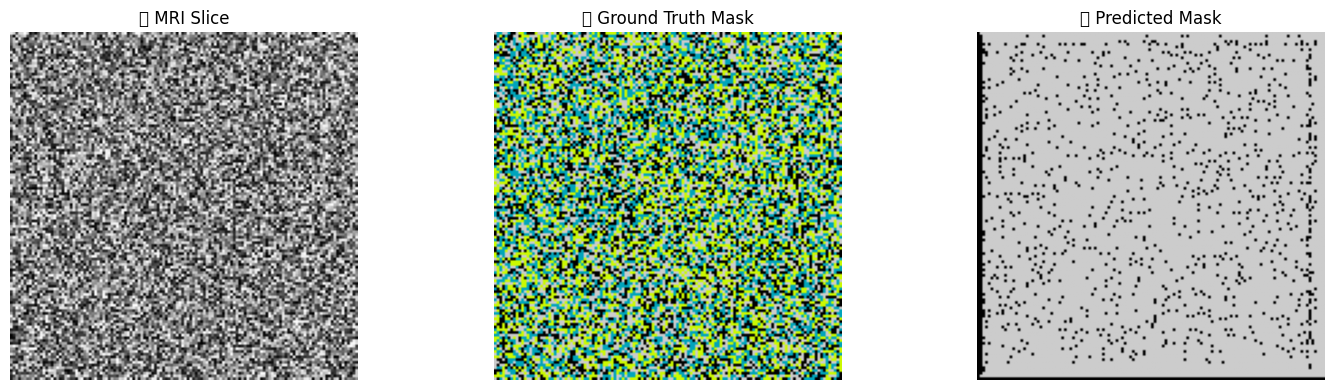

In [49]:
visualize_prediction(model, X_val, y_val)


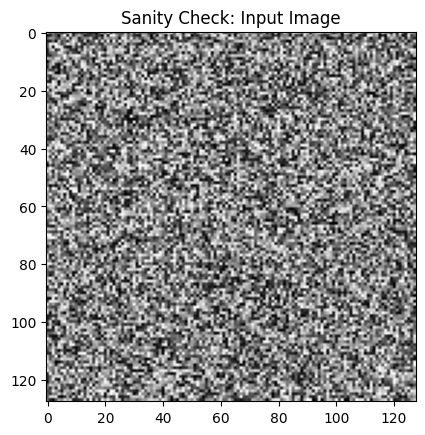

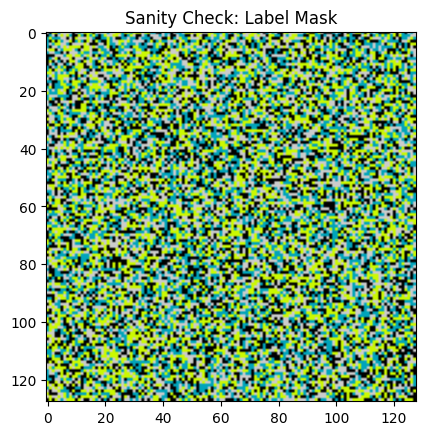

In [50]:
plt.imshow(X[0].squeeze(), cmap='gray')
plt.title("Sanity Check: Input Image")
plt.show()

plt.imshow(np.argmax(y[0], axis=-1), cmap='nipy_spectral')
plt.title("Sanity Check: Label Mask")
plt.show()


In [ ]:
import gradio as gr

# Resize + preprocess image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    norm = img / 255.0
    return norm.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# Predict and overlay mask
def predict_tumor(image):
    input_tensor, original = preprocess_image(image)
    pred_mask = (model.predict(input_tensor)[0, :, :, 0] > 0.5).astype(np.uint8) * 255

    # Create an overlay
    overlay = cv2.addWeighted(original, 0.6, pred_mask, 0.4, 0)

    # Stack results for display
    combined = np.concatenate([original, pred_mask, overlay], axis=1)
    return combined


In [41]:
!pip install gradio --quiet

import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
from scipy.ndimage import binary_opening

# === Configuration ===
IMG_SIZE = 128
pixel_spacing_mm = 0.5  # in millimeters
pixel_area_mm2 = pixel_spacing_mm ** 2

# === Load model ===
model = tf.keras.models.load_model('/content/brain_tumor_unet_model.keras', compile=False)

# === Preprocess image ===
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    normalized = img / 255.0
    return normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# === Predict function ===
def predict_tumor_fast(image, alpha=0.5):
    input_tensor, original = preprocess_image(image)
    raw_pred = model.predict(input_tensor, verbose=0)[0, :, :, 0]
    prediction = (raw_pred > 0.5).astype(np.uint8)

    # 🧹 Noise removal with morphological opening
    cleaned_pred = binary_opening(prediction, structure=np.ones((3, 3))).astype(np.uint8)

    # 📏 Tumor area calculation
    tumor_area_px = np.sum(cleaned_pred)
    tumor_area_mm2 = tumor_area_px * pixel_area_mm2
    tumor_detected = "Yes" if tumor_area_mm2 > 50 else "No"

    # 🖼️ Create overlay
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    mask_colored = np.stack([cleaned_pred * 255] * 3, axis=-1)
    overlay = cv2.addWeighted(original_rgb, 1 - alpha, mask_colored, alpha, 0)

    # 🧠 Metrics
    metrics = f"Tumor: {tumor_detected} | Area: {tumor_area_mm2:.2f} mm²"
    return overlay, cleaned_pred * 255, metrics

# === Gradio App ===
app = gr.Interface(
    fn=predict_tumor_fast,
    inputs=[
        gr.Image(type="numpy", label="Upload Brain MRI"),
        gr.Slider(0.0, 1.0, value=0.5, label="Overlay Opacity")
    ],
    outputs=[
        gr.Image(label="Overlay Segmentation"),
        gr.Image(label="Predicted Mask"),
        gr.Label(label="Tumor Metrics")
    ],
    title="🧠 Fast Brain Tumor Segmentation",
    description="Upload a brain MRI to detect tumor regions using Attention U-Net. Adjust overlay opacity and get real-time tumor area and classification."
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6fef6acaed66845425.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:
!pip install gradio --quiet

import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
from scipy.ndimage import binary_opening
import uuid

# === Configuration ===
IMG_SIZE = 128
pixel_spacing_mm = 0.5  # mm per pixel
pixel_area_mm2 = pixel_spacing_mm ** 2

# === Load trained model ===
model = tf.keras.models.load_model('/content/brain_tumor_unet_model.keras', compile=False)

# === Preprocess image ===
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    normalized = img / 255.0
    return normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# === Prediction function ===
def predict_tumor_enhanced(image, alpha=0.5):
    input_tensor, original = preprocess_image(image)
    raw_pred = model.predict(input_tensor, verbose=0)[0, :, :, 0]
    prediction = (raw_pred > 0.5).astype(np.uint8)

    # Morphological noise filtering
    cleaned_pred = binary_opening(prediction, structure=np.ones((3, 3))).astype(np.uint8)

    # Tumor area & confidence
    tumor_area_px = np.sum(cleaned_pred)
    tumor_area_mm2 = tumor_area_px * pixel_area_mm2
    confidence_score = (tumor_area_px / (IMG_SIZE * IMG_SIZE)) * 100
    tumor_detected = "Yes" if tumor_area_mm2 > 50 else "No"

    # Create overlay with ROI box
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    mask_colored = np.stack([cleaned_pred * 255] * 3, axis=-1)
    overlay = cv2.addWeighted(original_rgb, 1 - alpha, mask_colored, alpha, 0)

    # Draw bounding boxes if tumor exists
    if tumor_detected == "Yes":
        contours, _ = cv2.findContours(cleaned_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # Save mask to file
    mask_filename = f"/content/tumor_mask_{uuid.uuid4().hex}.png"
    cv2.imwrite(mask_filename, cleaned_pred * 255)

    # Build metrics string
    metrics = f"Tumor: {tumor_detected} | Area: {tumor_area_mm2:.2f} mm² | Confidence: {confidence_score:.1f}%"

    return overlay, cleaned_pred * 255, metrics, mask_filename

# === Gradio Interface ===
app = gr.Interface(
    fn=predict_tumor_enhanced,
    inputs=[
        gr.Image(type="numpy", label="Upload Brain MRI"),
        gr.Slider(0.0, 1.0, value=0.5, label="Overlay Opacity")
    ],
    outputs=[
        gr.Image(label="Overlay Segmentation"),
        gr.Image(label="Predicted Mask"),
        gr.Label(label="Tumor Metrics"),
        gr.File(label="Download Predicted Mask")
    ],
    title="🧠 Advanced Brain Tumor Segmentation AI",
    description=(
        "Real-time tumor detection from MRI with Attention U-Net. Features include overlay transparency control, "
        "bounding box visualization, tumor area estimation, confidence scoring, and downloadable masks."
    )
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://599ab969a23c94c410.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [43]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.ndimage import binary_opening
import uuid

# Constants
IMG_SIZE = 128
pixel_spacing_mm = 0.5
pixel_area_mm2 = pixel_spacing_mm ** 2

# Load model
model = tf.keras.models.load_model('/content/brain_tumor_unet_model.keras', compile=False)

# Preprocess image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    normalized = img / 255.0
    return normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# Main prediction function
def predict_tumor_enhanced(image, alpha=0.5):
    input_tensor, original = preprocess_image(image)
    raw_pred = model.predict(input_tensor, verbose=0)[0, :, :, 0]
    prediction = (raw_pred > 0.5).astype(np.uint8)

    # Remove noise
    cleaned_pred = binary_opening(prediction, structure=np.ones((3, 3))).astype(np.uint8)

    # Area and confidence
    tumor_area_px = np.sum(cleaned_pred)
    tumor_area_mm2 = tumor_area_px * pixel_area_mm2
    confidence_score = (tumor_area_px / (IMG_SIZE * IMG_SIZE)) * 100
    tumor_detected = "Yes" if tumor_area_mm2 > 50 else "No"

    # Severity scoring
    if tumor_area_mm2 < 100:
        severity = "Low"
    elif tumor_area_mm2 < 300:
        severity = "Moderate"
    else:
        severity = "High"

    # Overlay mask on original
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    mask_colored = np.stack([cleaned_pred * 255] * 3, axis=-1)
    overlay = cv2.addWeighted(original_rgb, 1 - alpha, mask_colored, alpha, 0)

    # Draw ROI box
    if tumor_detected == "Yes":
        contours, _ = cv2.findContours(cleaned_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # Save mask
    mask_filename = f"/content/tumor_mask_{uuid.uuid4().hex}.png"
    cv2.imwrite(mask_filename, cleaned_pred * 255)

    # Metrics string
    metrics = f"Tumor: {tumor_detected} | Area: {tumor_area_mm2:.2f} mm² | Confidence: {confidence_score:.1f}% | Severity: {severity}"
    return overlay, cleaned_pred * 255, metrics, mask_filename


In [44]:
import gradio as gr

app = gr.Interface(
    fn=predict_tumor_enhanced,
    inputs=[
        gr.Image(type="numpy", label="Upload Brain MRI"),
        gr.Slider(0.0, 1.0, value=0.5, label="Overlay Opacity")
    ],
    outputs=[
        gr.Image(label="Overlay Segmentation"),
        gr.Image(label="Predicted Mask"),
        gr.Label(label="Tumor Metrics"),
        gr.File(label="Download Predicted Mask")
    ],
    title="🧠 Advanced Brain Tumor Segmentation AI",
    description=(
        "Upload a brain MRI to detect tumor regions using Attention U-Net. Includes confidence score, severity level, "
        "adjustable overlay, bounding box, and downloadable tumor mask."
    )
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7db0e2fbfb04cc0792.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [45]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.ndimage import binary_opening
import uuid

# Constants
IMG_SIZE = 128
pixel_spacing_mm = 0.5
pixel_area_mm2 = pixel_spacing_mm ** 2

# Load model
model = tf.keras.models.load_model('/content/brain_tumor_unet_model.keras', compile=False)

# Preprocess image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    normalized = img / 255.0
    return normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# Enhanced prediction with location
def predict_tumor_enhanced(image, alpha=0.5):
    input_tensor, original = preprocess_image(image)
    raw_pred = model.predict(input_tensor, verbose=0)[0, :, :, 0]
    prediction = (raw_pred > 0.5).astype(np.uint8)

    # Morphological filtering
    cleaned_pred = binary_opening(prediction, structure=np.ones((3, 3))).astype(np.uint8)

    # Area and confidence
    tumor_area_px = np.sum(cleaned_pred)
    tumor_area_mm2 = tumor_area_px * pixel_area_mm2
    confidence_score = (tumor_area_px / (IMG_SIZE * IMG_SIZE)) * 100
    tumor_detected = "Yes" if tumor_area_mm2 > 50 else "No"

    # Severity scoring
    if tumor_area_mm2 < 100:
        severity = "Low"
    elif tumor_area_mm2 < 300:
        severity = "Moderate"
    else:
        severity = "High"

    # Quadrant-based location detection
    location = "No tumor"
    if tumor_detected == "Yes":
        coords = np.column_stack(np.where(cleaned_pred > 0))
        cy, cx = coords.mean(axis=0)  # row = y, col = x
        if cx < 64 and cy < 64:
            location = "Left Frontal Lobe"
        elif cx >= 64 and cy < 64:
            location = "Right Frontal Lobe"
        elif cx < 64 and cy >= 64:
            location = "Left Temporal Lobe"
        else:
            location = "Right Temporal Lobe"

    # Overlay creation
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    mask_colored = np.stack([cleaned_pred * 255] * 3, axis=-1)
    overlay = cv2.addWeighted(original_rgb, 1 - alpha, mask_colored, alpha, 0)

    # Draw bounding boxes
    if tumor_detected == "Yes":
        contours, _ = cv2.findContours(cleaned_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # Save predicted mask
    mask_filename = f"/content/tumor_mask_{uuid.uuid4().hex}.png"
    cv2.imwrite(mask_filename, cleaned_pred * 255)

    # Output string
    metrics = (
        f"Tumor: {tumor_detected} | Area: {tumor_area_mm2:.2f} mm² | "
        f"Confidence: {confidence_score:.1f}% | Severity: {severity} | Location: {location}"
    )

    return overlay, cleaned_pred * 255, metrics, mask_filename


In [46]:
import gradio as gr

app = gr.Interface(
    fn=predict_tumor_enhanced,  # Make sure this includes location logic
    inputs=[
        gr.Image(type="numpy", label="Upload Brain MRI"),
        gr.Slider(0.0, 1.0, value=0.5, label="Overlay Opacity")
    ],
    outputs=[
        gr.Image(label="Overlay Segmentation"),
        gr.Image(label="Predicted Mask"),
        gr.Label(label="Tumor Metrics"),
        gr.File(label="Download Predicted Mask")
    ],
    title="🧠 Advanced Brain Tumor Segmentation AI",
    description=(
        "Real-time brain tumor detection using Attention U-Net.\n"
        "Displays bounding boxes, tumor area (mm²), confidence %, severity level, anatomical location, and offers downloadable mask output."
    )
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1d42cad88740c213bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [47]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.ndimage import binary_opening
import uuid

IMG_SIZE = 128
pixel_spacing_mm = 0.5
pixel_area_mm2 = pixel_spacing_mm ** 2

# Load model
model = tf.keras.models.load_model('/content/brain_tumor_unet_model.keras', compile=False)

# Preprocess image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    normalized = img / 255.0
    return normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1), img

# Main prediction function
def predict_tumor_enhanced(image, alpha=0.5):
    input_tensor, original = preprocess_image(image)
    raw_pred = model.predict(input_tensor, verbose=0)[0, :, :, 0]
    prediction = (raw_pred > 0.5).astype(np.uint8)

    # Clean mask
    cleaned_pred = binary_opening(prediction, structure=np.ones((3, 3))).astype(np.uint8)

    # Area and confidence
    tumor_area_px = np.sum(cleaned_pred)
    tumor_area_mm2 = tumor_area_px * pixel_area_mm2
    confidence_score = (tumor_area_px / (IMG_SIZE * IMG_SIZE)) * 100
    tumor_detected = "Yes" if tumor_area_mm2 > 50 else "No"

    # Severity
    if tumor_area_mm2 < 100:
        severity = "Low"
    elif tumor_area_mm2 < 300:
        severity = "Moderate"
    else:
        severity = "High"

    # Location
    location = "No tumor"
    cx, cy = 0, 0
    if tumor_detected == "Yes":
        coords = np.column_stack(np.where(cleaned_pred > 0))
        cy, cx = coords.mean(axis=0)
        if cx < 64 and cy < 64:
            location = "Left Frontal Lobe"
        elif cx >= 64 and cy < 64:
            location = "Right Frontal Lobe"
        elif cx < 64 and cy >= 64:
            location = "Left Temporal Lobe"
        else:
            location = "Right Temporal Lobe"

    # Overlay
    original_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
    mask_colored = np.stack([cleaned_pred * 255] * 3, axis=-1)
    overlay = cv2.addWeighted(original_rgb, 1 - alpha, mask_colored, alpha, 0)

    # Draw bounding box + marker
    if tumor_detected == "Yes":
        contours, _ = cv2.findContours(cleaned_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 255, 255), 2)

        center = (int(cx), int(cy))
        cv2.drawMarker(overlay, center, (0, 255, 0), markerType=cv2.MARKER_CROSS,
                       markerSize=10, thickness=2)
        cv2.putText(overlay, location, (center[0] - 40, center[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1, cv2.LINE_AA)

    # Save mask
    mask_filename = f"/content/tumor_mask_{uuid.uuid4().hex}.png"
    cv2.imwrite(mask_filename, cleaned_pred * 255)

    # Output metrics
    metrics = (
        f"Tumor: {tumor_detected} | Area: {tumor_area_mm2:.2f} mm² | "
        f"Confidence: {confidence_score:.1f}% | Severity: {severity} | Location: {location}"
    )

    return overlay, cleaned_pred * 255, metrics, mask_filename


In [48]:
import gradio as gr

app = gr.Interface(
    fn=predict_tumor_enhanced,
    inputs=[
        gr.Image(type="numpy", label="Upload Brain MRI"),
        gr.Slider(0.0, 1.0, value=0.5, label="Overlay Opacity")
    ],
    outputs=[
        gr.Image(label="Overlay Segmentation with Location Marker"),
        gr.Image(label="Predicted Binary Mask"),
        gr.Label(label="Tumor Metrics"),
        gr.File(label="Download Predicted Mask")
    ],
    title="🧠 Advanced Brain Tumor Segmentation & Localization",
    description=(
        "Upload a brain MRI to segment and locate tumors using Attention U-Net.\n"
        "Now includes location quadrant detection (e.g., Left Frontal Lobe), confidence %, severity level, bounding box, "
        "overlay opacity control, and a downloadable binary mask output."
    )
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c66f0773fde9cbb431.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
